In [3]:
! jupyter trust food-for-thought-and-atom.ipynb
# print(pio.renderers)
# pio.renderers.default = "svg"

Signing notebook: food-for-thought-and-atom.ipynb


In [4]:
import pprint
import re
import numpy as np
import pandas as pd
import sys
import copy
import glob
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import Image
import warnings
site_package_path = glob.glob("/*/*/*/*/vacation-projects/recipes/recipes/lib/python3.8/site-packages")[0]
sys.path.append(site_package_path)
import pymongo 
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) #This was to supress the division by zero warning. Not worried about it at the momemnt
with open(glob.glob('/*/*/*/*/mymongo')[0]) as f:
    pass_key = f.read()
pass_key=pass_key.strip('\n')

In [5]:

# connect to the database as a user name with read-only privilege. Protecting myself from myself here.
user_name = 'ze_readOnly'
client = MongoClient()
try:
    client = MongoClient(username=user_name, password=pass_key)
    print('Server available, you are authenticated as user %s.'%(user_name))

except ConnectionFailure:
    print("Server not available")

Server available, you are authenticated as user ze_readOnly.


In [6]:
db = client.allrecipes
db_collection = db.recipes

In [7]:
# for parsing the collection data
def append_value(dict_obj, key, value):
    [dict_obj[k].append(v) for k,v in zip(key,value)]
# if necessary, vectorize the function for speed 
append_value_v = np.vectorize(append_value)

In [8]:
# append all dicts of recipes from one Author
reciped = {'_id': [], 'title': [], 'Author': [], 'ingredient': [], 'direction': [], 
           'nutrition_per_serving': [], 'total_ratings': [], 
           'ratings': [], 'prep': [], 'cook': [], 'additional': [], 
           'total': [], 'Servings': [], 'Yield': []
          }

keys = list(reciped.keys())
for recipe in db_collection.find(): #({"Author": 'MakeItHealthy'}):
    if recipe.get('nutrition_per_serving'):  # <<--- this is because there are recipes (43 currently) that have no nutirtion info 
       values = [recipe.get(k) for k in keys]
       append_value(reciped,keys,values)

In [9]:
# create a pandas data frame
allkeys = list(reciped.keys())
df = pd.DataFrame([reciped[k] for k in keys]).T
df.columns = allkeys
df.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,additional,total,Servings,Yield
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,None,50 mins,30,30 servings
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,46 mins,1 hr 6 mins,24,24 servings
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,9 hrs,9 hrs 10 mins,32,2 cups
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,30 mins,1 hr,16,16 servings
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,None,35 mins,28,28 pancakes


In [10]:
# working on a copy is always safer with mutable data structures  like pandas data frames
dff = copy.deepcopy(df)

In [11]:
# print out cooking directions for the first couple of them
for ttl, dr in zip(dff.loc[0:1,'title'], dff.loc[0:1,'direction']):
    direction = list(itertools.chain(*dr))
    ds = [d for d in direction  if d != None ]
    print('\x1b[1;31m'+ttl+'\x1b[0m')
    print("\n".join(ds[:-1]))

Local Kine Wontons
Step 1
Heat oil in a large, heavy saucepan to 375 degrees F (190 degrees C).
Step 2
In a medium bowl, mix the cream cheese, soy sauce, imitation crabmeat, water chestnuts and green onions.
Step 3
Place approximately 1 teaspoon of the cream cheese mixture in the center of each wonton wrapper. Fold into triangles and seal edges with moistened fingers.
Step 4
In small batches, fry the wontons in the hot oil 3 to 4 minutes, until golden brown. Drain on paper towels.
VELVEETA® Potato Bites
Step 1
Cook potatoes in boiling water in large saucepan 15 to 20 min. or until tender; drain. Cool 10 min. Mash potatoes until smooth. Add onions, egg and pepper; mix just until blended.
Step 2
Heat oven to 400 degrees F. Empty coating mix into pie plate. Roll potato mixture into 24 balls, using about 2 Tbsp. for each. Insert 1 VELVEETA cube into center of each ball, completely enclosing VELVEETA. Add, 1 at a time, to coating mix; turn to evenly coat. Place on rimmed baking sheet spraye

In [12]:
def fun_int(nut):
    # takes a list, nut
    # extracts the numeric parts of nut units
    # returns  nut values and units
    nut_names = [name for name in nut[::2]]
    values = []
    units = []
    for n in nut:
        try:
            value = '.'.join(re.findall(r'\d+',n))
            values.append(float(value))

            if isinstance (float(value), float):
                unit = n.strip(value)
                unit = unit.strip('.')
                units.append(unit)
        except ValueError:
            pass
        
    return nut_names, values, units 

In [13]:
# As noted above some columns are made of lists of lists. Need the  nutrition_per_serving in particular and going to flesh the data out from inside the lists

nut_list = list(itertools.chain(*dff['nutrition_per_serving'])) # gets a list out of data frame

# creating dictionaries 
Nut_names = []
Values = []
Units = []
ObjId = []
nunml=[]    
for nuts,objid in zip(nut_list,dff['_id']):

    nut = nuts.replace(';','')
    nut = nut.split(' ')
    nut[0], nut[1] = nut[1], nut[0]
    nut_names,values, units = fun_int(nut)
    Nut_names.append(nut_names)
    Values.append(values)
    Units.append(units)
    # if len(nut_names) < 5:
    #     nunml.append(len(nut_names))
    ObjId.append([str(objid)]*len(nut_names))


In [14]:
# creating a dataframe of just nutrients ( call it dnut)
# The goal is to create a multiindex data frame with food id as top level, and nutrient names under it.
# Obviously there are more nutrients in each recipe than I scraped, but it is ok for now to work with what we have 
arrays = [ np.array(list(itertools.chain(*ObjId))),
          np.array(list(itertools.chain(*Nut_names)))]
dnut = pd.DataFrame({
                     'nut_value':list(itertools.chain(*Values)), 
                     'nut_unit': list(itertools.chain(*Units)),
                    },index = arrays)
dnut = dnut.astype({'nut_value': 'float64'}).T
dnut

611c22af28708657c245a2cb                                         \
                          calories protein carbohydrates  fat cholesterol   
nut_value                    168.0     4.7          18.0  8.6        21.0   
nut_unit                                 g             g    g          mg   

                 611c22b128708657c245a2cc                             ...  \
          sodium                 calories protein carbohydrates  fat  ...   
nut_value  348.8                     67.0     2.6          11.0  1.5  ...   
nut_unit      mg                                g             g    g  ...   

          611c6bb628708657c245b6d1                            \
                           protein carbohydrates  fat sodium   
nut_value                      1.5           5.2  3.9   56.8   
nut_unit                         g             g    g     mg   

          611c6bba28708657c245b6d2                                          \
                          calories protein carbohydrates   fat cholesterol   
nut_value                    444.0    42.0          35.7  15.1        58.7   
nut_unit                                 g             g     g          mg   

                   
           sodium  
nut_value  1584.6  
nut_unit       mg  

[2 rows x 29327 columns]

In [15]:
# parameters collected from various sources including USDA, https://www.healthline.com/health/high-cholesterol/rda, and https://www.acefitness.org/education-and-resources/professional/expert-articles/5904/how-to-determine-the-best-macronutrient-ratio-for-your-goals/
CARB = np.array([.45, .65])  # calorie fraction from carbohydrate 
PRO = np.array([.1,.35])    # calorie fraction from protein
FAT = np.array([.2, .35])   # calorie fraction from fat
CHOL = np.array([5.5, 6.5]) # This corresponds to min and max of cholesterol ([11000/2000, 13000/2000])  mg/cal min and max of cholesterol 
SOD = np.array([1, 2])    # min and max of Sodium

# Pretend we are food experts... and rate food. Ignore food that does not have fat, protein,carbs and sodium for simplifying task
# This might be what they call feature engineering.
def food_rater(dff):
    df = copy.deepcopy(dff)

    LIST1 = list(np.sort(['sodium', 'carbohydrates', 'protein', 'fat']))
    LIST2 = list(np.sort(list(set(['fat', 'protein', 'sodium', 'carbohydrates']).intersection(set(df.columns))))) 

    if LIST1 == LIST2:
                                                          
        if 'cholesterol' not in df:
            tot_cal = 4.0*df['carbohydrates'].get('nut_value') +4.0*df['protein'].get('nut_value') + 9.0*df['fat'].get('nut_value') 
            Xcarb = 4.0*df['carbohydrates'].get('nut_value')/tot_cal
            Xpro = 4.0*df['protein'].get('nut_value')/tot_cal
            Xfat = 9.0*df['fat'].get('nut_value')/tot_cal
            Xsod = df['sodium'].get('nut_value')/tot_cal
            Xchol = 'NA'
        else:
            tot_cal = 4.0*df['carbohydrates'].get('nut_value') +4.0*df['protein'].get('nut_value') + 9.0*df['fat'].get('nut_value') +0.009*df['cholesterol'].get('nut_value') 
                    # assuming unit is mg and cholesterol is still fat with 9 cal/gram cal source
            Xcarb = 4.0*df['carbohydrates'].get('nut_value')/tot_cal
            Xpro = 4.0*df['protein'].get('nut_value')/tot_cal
            Xfat = 9.0*df['fat'].get('nut_value')/tot_cal
            Xsod = df['sodium'].get('nut_value')/tot_cal
            Xchol = df['cholesterol'].get('nut_value')/tot_cal

            if Xchol <= CHOL[0]:
                df.loc['nut_value','cholesterol_level'] = 'low'
            elif Xchol >= CHOL[1]:
                df.loc['nut_value','cholesterol_level'] = 'high'
            else:
                df.loc['nut_value','cholesterol_level'] = 'normal'  
    else:
        tot_cal = np.nan 
        Xcarb = 'NA'
        Xpro = 'NA'
        Xfat = 'NA'
        Xsod = 'NA'
        Xchol = 'NA'
        
    if Xcarb != 'NA':  

        if Xcarb  <= CARB[0]:
            df.loc['nut_value','carbohydrates_level'] = 'low'
            df.loc['nut_value','carbohydrates_score'] = 1
        elif Xcarb >= CARB[1]:
            df.loc['nut_value','carbohydrates_level'] = 'high'
            df.loc['nut_value','carbohydrates_score'] = 0
        else:
            df.loc['nut_value','carbohydrates_level'] = 'normal' 
            df.loc['nut_value','carbohydrates_score'] = 2
    else:
            df.loc['nut_value','carbohydrates_level'] = np.nan 
            df.loc['nut_value','carbohydrates_score'] = np.nan
    
    if Xpro != 'NA':  

        if Xpro  <= PRO[0]:
            df.loc['nut_value','protien_level'] = 'low'
            df.loc['nut_value','protien_score'] = 1
        elif Xpro >= PRO[1]:
            df.loc['nut_value','protien_level'] = 'high'
            df.loc['nut_value','protien_score'] = 0
        else:
            df.loc['nut_value','protien_level'] = 'normal' 
            df.loc['nut_value','protien_score'] = 2
    else:
            df.loc['nut_value','protien_level'] = np.nan 
            df.loc['nut_value','protien_score'] = np.nan


    if Xfat != 'NA':    
        
        if Xfat  <= FAT[0]:
            df.loc['nut_value','fat_level'] = 'low'
            df.loc['nut_value','fat_score'] = 1
        elif Xfat >= FAT[1]:
            df.loc['nut_value','fat_level'] = 'high'
            df.loc['nut_value','fat_score'] = 0
        else:
            df.loc['nut_value','fat_level'] = 'normal'
            df.loc['nut_value','fat_score'] = 2
    else:
            df.loc['nut_value','fat_level'] = np.nan
            df.loc['nut_value','fat_score'] = np.nan
        
    if Xsod != 'NA':
        if Xsod <= 1: 
            df.loc['nut_value','sodium_level'] = 'good' 
            df.loc['nut_value','sodium_score'] = 2
        elif Xsod >= SOD[0] and Xsod <=SOD[1]:
            df.loc['nut_value','sodium_level'] = 'normal' 
            df.loc['nut_value','sodium_score'] = 1
        else:  
            df.loc['nut_value','sodium_level'] = 'bad' 
            df.loc['nut_value','sodium_score'] = 0
    else:
        df.loc['nut_value','sodium_level'] = np.nan 
        df.loc['nut_value','sodium_score'] = np.nan

    tot_score = df.fillna(0).loc['nut_value',['_score' in col for col in  df.columns]].sum()
    if tot_score in [0,2]:
        df['overall_food_quality'] = 'bad'
    elif tot_score in [3,4]:
        df['overall_food_quality'] = 'good'
    else:
        df['overall_food_quality'] = 'excellent'
    return df


In [16]:
# Now rate food based on nutrient composition. Note that the food id is appended to each food so we can trace back to it later on
# from functools import lru_cache
# @lru_cache(maxsize=32)
def rate_(dff):
    food=pd.DataFrame()
    for ids in dff['_id'].values:
        try:
            tot_cal = food_rater(dnut.get(str(ids)))
            tot_cal['food_id'] = ids
            food = food.append(tot_cal)
        except AttributeError:
            pass
    return food


In [17]:
food = rate_(dff)
food.loc['nut_value'].head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,food_id
nut_value,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
nut_value,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
nut_value,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd
nut_value,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,611c22b928708657c245a2ce
nut_value,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,611c22be28708657c245a2cf


In [18]:
# try to calculate total labour cost assuming a minimium wage (give yourself a higher wage if you are a pro chief ... or whatever)
# the columns related to time are...
labour = copy.deepcopy(dff[["prep","cook","additional","total"]])
labour.head()

,prep,cook,additional,total
0,30 mins,20 mins,None,50 mins
1,20 mins,None,46 mins,1 hr 6 mins
2,10 mins,None,9 hrs,9 hrs 10 mins
3,15 mins,15 mins,30 mins,1 hr
4,15 mins,20 mins,None,35 mins


In [19]:
# as you can see above we need to clean up and homogenize the time units. We do that below and compute the total labour cost for each food recipe
def homo_time_units(x):
    if x is not None:
        x = x.replace('s','')
        x_list = x.split(' ')

        if 'hr' in x_list and 'min' in x_list:
                y =float(x_list[0]) + float(x_list[2])/60.0 # time in units of hr
        else:        
            if 'min' in x:
                y=float(x.replace('min',''))/60.0 # time in units of hr

            if  'hr' in x:
                y = float(x.replace('hr','')) 

            if  'day' in x:
                y = float(x.replace('day',''))*24 
      
        return  y 

labour['tot_hrs'] = labour['total'].apply(homo_time_units)
labour['tot_labour_cost($)']= labour['tot_hrs'].apply(lambda x: 10*x)
labour['_id'] = dff['_id']
labour.head()


,prep,cook,additional,total,tot_hrs,tot_labour_cost($),_id
0,30 mins,20 mins,None,50 mins,0.833333,8.333333,611c22af28708657c245a2cb
1,20 mins,None,46 mins,1 hr 6 mins,1.100000,11.000000,611c22b128708657c245a2cc
2,10 mins,None,9 hrs,9 hrs 10 mins,9.166667,91.666667,611c22b528708657c245a2cd
3,15 mins,15 mins,30 mins,1 hr,1.000000,10.000000,611c22b928708657c245a2ce
4,15 mins,20 mins,None,35 mins,0.583333,5.833333,611c22be28708657c245a2cf


In [20]:
# I wish I could do something with the ingredients so that I can estimate the material cost of each recipe. That would be great. Main problem is getting/scraping prices of each ingredients. Tried walmart's page... but they didn't like it.( also read their robots.txt file) 
# Anyway, going to look into the data here a bit further...
# print out ingredients for the first couple of recipes
for ttl, ingredients_ in zip(dff.loc[0:1,'title'], dff.loc[0:1,'ingredient']):
    # ingredients_ = list(itertools.chain(*ing))
    ds = ['- ' + d  for d in ingredients_  if d != None ]
    print('\x1b[1;44m'+ 'Ingredients for ' + ttl+'\x1b[0m')
    print("\n".join(ds[:-1]))



Ingredients for Local Kine Wontons
- 1 quart oil for deep frying 
- 2 (8 ounce) packages cream cheese, softened 
- 2 tablespoons soy sauce 
- 1 (12 ounce) package imitation crabmeat, flaked 
- 1 (5 ounce) can water chestnuts, drained and chopped 
- 5 green onions, chopped 
Ingredients for VELVEETA® Potato Bites
- 2 pounds baking potatoes, peeled, cut into chunks 
- 2 green onions, thinly sliced 
- 1 egg, beaten 
- ¼ teaspoon black pepper 
- ¼ pound VELVEETA®, cut into 24 cubes 
- 1 (2.75 ounce) packet SHAKE 'N BAKE Extra Crispy Seasoned Coating Mix 


In [21]:
# If I was to work with the ingredients data, I would have needed to deal with the 20 unicodes. No expert on html at the moment (no expert on anything for that matter - just a person with too many interestes)
# I would do some silly coding to extract/convert the special unicode characters as

stupid_dict={'¼':.250, 
 '½':.500, 
 '¾':.750,
 '⅐':.142,  
'⅑':.111,  
'⅒':.010, 
 '⅓':.333,  
 '⅔':.667, 
 '⅕':.200, 
 '⅖':.400,  
 '⅗':.600,  
 '⅘':.800,  
 '⅙':.167,  
 '⅚':833,  
 '⅛':.125, 
 '⅜':.375,  
 '⅝':.675,  
 '⅞':.875,  
 '⅟':1.00,  
 '↉':0.00} 

for ks in dff.loc[0:10,'ingredient']:

    [print('\t{}\t{}'.format(s,ks)) for s in stupid_dict.keys() if s in  ks[0]]

	½	['½ cup ketchup ', '½ cup mustard ', '2 cups chocolate flavored crispy rice cereal ', '4 skinless, boneless chicken breast halves ']


In [22]:
# how are we doin with memory management so far?
df.memory_usage(deep=True)

Index                        128
_id                       162720
title                     418617
Author                    343851
ingredient                654552
direction                 449960
nutrition_per_serving     406800
total_ratings             399952
ratings                  1139040
prep                      321495
cook                      234621
additional                183188
total                     328578
Servings                  302576
Yield                     347311
dtype: int64

In [23]:
df.select_dtypes(include = 'O').memory_usage(deep=True).sum()

5693389

In [24]:
# It's all about ratings, as some president would say. Let's see how each recipe does on a weighted average rating metric. Use the weight w = [5,4,3,2,1] corresponding to the number of stars and the order they are in the data
# calculate weighted means of star ratings of each recipe
def wtavg_star(r):
    w = np.array([5,4,3,2,1])
    if list(r.values()):
        avg_star = np.sum(list(r.values())*w)/15.0  # 15.0 is sum of the weights. I realized w should have been something like [5/15,4/15,3/15,2/15,1/15] so that the sum is 1. But it does not make a difference in the final ratings- just a scale change.
        return avg_star 
    else: 
        return np.nan
dff['weighted_mean_ratings'] = dff['ratings'].apply(wtavg_star)
dff.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,additional,total,Servings,Yield,weighted_mean_ratings
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,None,50 mins,30,30 servings,29.666667
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,46 mins,1 hr 6 mins,24,24 servings,0.533333
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,9 hrs,9 hrs 10 mins,32,2 cups,0.333333
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,30 mins,1 hr,16,16 servings,4.000000
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,None,35 mins,28,28 pancakes,35.000000


<br>Enough with the ratings, now merge all new data columns created</br>
  They are:
 1. "tot_labour_cost($)" from labour df
 2. all columns from food df. For merging to work smoothly, update the column name food_id to simply _id. Ignore nut_unit rows at this point

In [25]:
food.rename(columns={'food_id':'_id'}, inplace=True)
food.head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,_id
nut_value,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
nut_unit,,g,g,g,mg,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,611c22af28708657c245a2cb
nut_value,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
nut_unit,,g,g,g,mg,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excellent,611c22b128708657c245a2cc
nut_value,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd


In [26]:
food_quality = copy.deepcopy(food.loc['nut_value',:].reset_index().drop(columns=['index']))
food_quality.head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,_id
0,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
1,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
2,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd
3,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,611c22b928708657c245a2ce
4,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,611c22be28708657c245a2cf


In [27]:
final_df = copy.deepcopy(dff)
final_df = final_df.merge(food_quality,on='_id').merge(labour[["tot_hrs", "tot_labour_cost($)","_id"]],on='_id')
final_df.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,...,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_hrs,tot_labour_cost($)
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,...,1.0,normal,2.0,high,0.0,bad,0.0,good,0.833333,8.333333
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,...,2.0,normal,2.0,low,1.0,bad,0.0,excellent,1.100000,11.000000
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,...,1.0,normal,2.0,high,0.0,good,2.0,excellent,9.166667,91.666667
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,...,2.0,normal,2.0,high,0.0,bad,0.0,good,1.000000,10.000000
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,...,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,0.583333,5.833333


In [28]:
# some useful data are still not in useable form for analysis.  Try this...
list_to_numeric = ['protein','tot_hrs','tot_labour_cost($)','calories', 'protein','carbohydrates', 'fat', 'cholesterol','sodium']
numeric_dict = {key:'float' for key in list_to_numeric}
final_df = final_df.astype(numeric_dict) 
final_df['Servings'] = final_df['Servings'].astype(int)

In [29]:
# that looks better. Explore a bit more the numerical data. We will encode the categorical data such as overall food quality  later on
final_df.select_dtypes(exclude='O').head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,carbohydrates_score,protien_score,fat_score,sodium_score,tot_hrs,tot_labour_cost($)
0,30,29.666667,168.0,4.7,18.0,8.6,21.0,348.8,1.0,2.0,0.0,0.0,0.833333,8.333333
1,24,0.533333,67.0,2.6,11.0,1.5,11.5,245.0,2.0,2.0,1.0,0.0,1.100000,11.000000
2,32,0.333333,48.0,1.5,2.7,3.8,NaN,37.4,1.0,2.0,0.0,2.0,9.166667,91.666667
3,16,4.000000,275.0,7.9,33.0,12.4,8.9,722.5,2.0,2.0,0.0,0.0,1.000000,10.000000
4,28,35.000000,121.0,4.2,17.4,4.2,36.8,208.9,2.0,2.0,2.0,1.0,0.583333,5.833333


<p> Serious questions to ask the data</p>

- On average, do people love good/healthy food?
- Is there a statisitcally significant relationship between star ratings and say labour cost/time of making the recipe?
- Can we build a nice, unsupervised classification of recipes using ML algorithms?
- What other questions can we ask on results of unsupervised ML experiments?
- and a lot more questions.

In [30]:
# drop columns we don't need for ML
cols_to_drop = ['_id','title','Author','ingredient','direction','nutrition_per_serving','total_ratings','ratings','prep','cook','additional','total','Yield','tot_hrs']
final_df.drop(columns= cols_to_drop, inplace=True)

In [31]:
# check missing values
print(pd.isnull(final_df).sum())

Servings                    0
weighted_mean_ratings     214
calories                    0
protein                     6
carbohydrates               1
fat                        36
cholesterol              1139
sodium                      1
cholesterol_level        1145
carbohydrates_level        40
carbohydrates_score        40
protien_level              40
protien_score              40
fat_level                  40
fat_score                  40
sodium_level               40
sodium_score               40
overall_food_quality        0
tot_labour_cost($)        183
dtype: int64


In [32]:
# Remove the rows with NaNs. But from the data analysis point of view we are better of removing cholesterol related columns, rather than losing too many (over 1000 out of nearly 5000) rows.
#  Separately analyze those recipes with cholesterol later 
# Just remember, altough small, there are contributions to the total calorie calculated from cholesterol. Then drop nans
# final_df.drop(columns= ['cholesterol_level','cholesterol'], inplace=True)
# final_df.dropna(inplace =False).shape

# Actually, I really need to drop the nans, and convert weighted_mean_ratings col to int type so we can work with it in LR and all. Imputing with some statistic may not be ideal here
final_df.dropna(axis=0, inplace=True)

In [33]:
# #Lets make the dropna change permanent and reset indexes
# final_df.dropna(inplace =True)
# final_df.reset_index(inplace=True)
# pre_null_drop_index =  final_df['index'].values
# final_df = final_df.drop(columns=['index'])

In [34]:
final_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
0,30,29.666667,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,8.333333
1,24,0.533333,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,11.000000
3,16,4.000000,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,10.000000
4,28,35.000000,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,5.833333
5,8,5.800000,456.0,11.2,15.3,40.4,42.7,414.0,low,low,1.0,low,1.0,high,0.0,good,2.0,good,10.000000


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 5084
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Servings               3636 non-null   int64  
 1   weighted_mean_ratings  3636 non-null   float64
 2   calories               3636 non-null   float64
 3   protein                3636 non-null   float64
 4   carbohydrates          3636 non-null   float64
 5   fat                    3636 non-null   float64
 6   cholesterol            3636 non-null   float64
 7   sodium                 3636 non-null   float64
 8   cholesterol_level      3636 non-null   object 
 9   carbohydrates_level    3636 non-null   object 
 10  carbohydrates_score    3636 non-null   float64
 11  protien_level          3636 non-null   object 
 12  protien_score          3636 non-null   float64
 13  fat_level              3636 non-null   object 
 14  fat_score              3636 non-null   float64
 15  sodi

In [36]:
for d,c in zip(final_df.dtypes, final_df.columns):
    if d == 'object':
        final_df[c] = final_df[c].astype('category')
final_df.dtypes       

Servings                    int64
weighted_mean_ratings     float64
calories                  float64
protein                   float64
carbohydrates             float64
fat                       float64
cholesterol               float64
sodium                    float64
cholesterol_level        category
carbohydrates_level      category
carbohydrates_score       float64
protien_level            category
protien_score             float64
fat_level                category
fat_score                 float64
sodium_level             category
sodium_score              float64
overall_food_quality     category
tot_labour_cost($)        float64
dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder as le
# Encode data
# very useful way from https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from collections import defaultdict
d = defaultdict(le)
# With this, you now retain all columns LabelEncoder as dictionary.
# Encoding the variable
final_encoded_df = final_df.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
inverse_final_encoded_df = final_encoded_df.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [38]:
final_encoded_df.sort_values(by='Servings').head(2)

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
5084,0,77,428,356,355,150,557,2843,0,1,1,0,0,2,2,0,0,2,29
336,0,19,162,181,229,8,95,1520,0,2,2,0,0,1,1,2,1,2,4


In [39]:
inverse_final_encoded_df.sort_values(by='Servings').head(2)

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
5084,1,5.133333,444.0,42.0,35.7,15.1,58.7,1584.6,low,low,1.0,high,0.0,normal,2.0,bad,0.0,good,5.000000
336,1,1.266667,176.0,18.3,23.0,0.9,9.5,337.1,low,normal,2.0,high,0.0,low,1.0,normal,1.0,good,0.833333


In [40]:
final_df.sort_values(by='Servings').head(2)

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
5084,1,5.133333,444.0,42.0,35.7,15.1,58.7,1584.6,low,low,1.0,high,0.0,normal,2.0,bad,0.0,good,5.000000
336,1,1.266667,176.0,18.3,23.0,0.9,9.5,337.1,low,normal,2.0,high,0.0,low,1.0,normal,1.0,good,0.833333


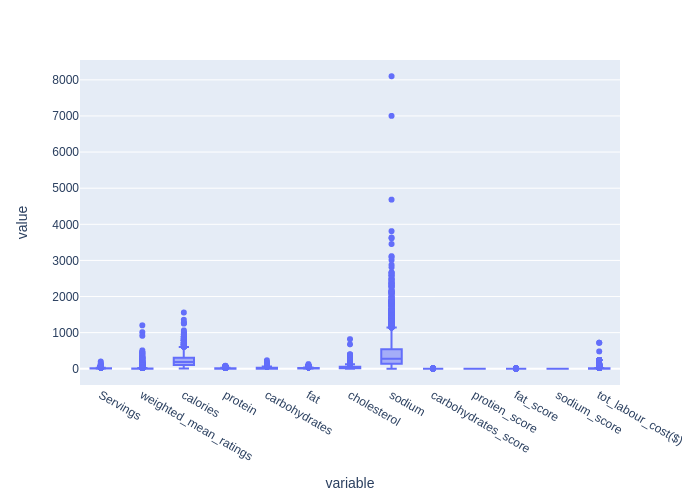

In [41]:
import plotly.express as px
fig = px.box(final_df.select_dtypes(exclude='category'))
# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

- the sodium data is suspecious ...

In [42]:
food_quality[food_quality['sodium'].max()==food_quality['sodium']]

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,_id
1585,386.0,12.2,41.8,18.9,83.5,8099.6,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c399528708657c245a90c


In [43]:
# using the index of the highest sodium recipe above , check the database
from bson import ObjectId
pprint.pprint(db_collection.find_one(ObjectId("611c399528708657c245a90c")))


{'Author': 'Jaana Bauman',
 'Servings': '6 ',
 'Yield': '30 dippers ',
 '_id': ObjectId('611c399528708657c245a90c'),
 'additional': '1 hr 10 mins ',
 'cook': '15 mins ',
 'direction': [['Step 1',
                'Combine water, butter, honey, and yeast in the bowl of a '
                'stand mixer; let stand until yeast activates and foams, about '
                '5 minutes.'],
               ['Step 2',
                'Mix flour and 1 1/4 teaspoon salt into yeast mixture on low '
                'speed until dough is just combined. Increase the speed to '
                'medium and continue kneading until the dough is smooth and '
                'begins to pull away from the side of the bowl. Add additional '
                'flour if needed, a little a time, until the dough is no '
                'longer sticky.'],
               ['Step 3',
                'Spray inside of a bowl with cooking spray, place dough in '
                'bowl, and turn to coat. Cover bowl with a tow


### So, the max sodium (8099.6 mg) is real data. [Here](https://www.allrecipes.com/recipe/239743/jalapeno-bacon-stuffed-pretzel-dippers/) is a link to the recipe. There are a few recipes with very high sodium levels, and I am keeping them all... One thing we should try is to transform the data. For example using the natural log as 

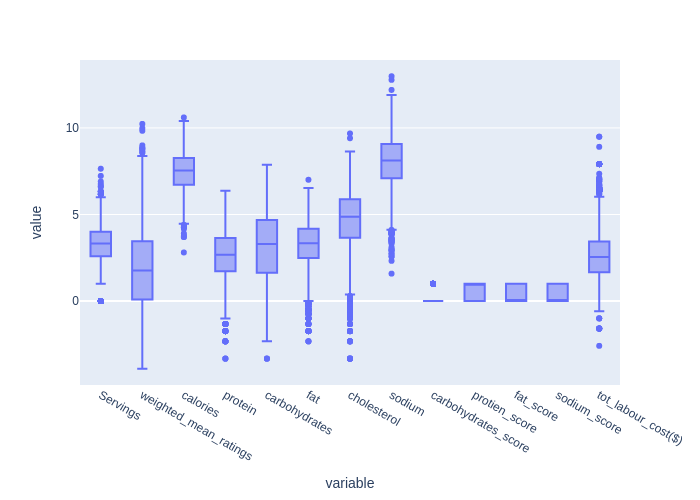

In [44]:
fig = px.box(final_df.select_dtypes(exclude='category').applymap(np.log2))
# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

<span style="color:gray"> Let's now try automated ml using atom. We keep the raw data as is unlike in the previous case where we manually cleaned the data,and scaled it. atom will do it for us </span>
<span style="color:gray"> We start by installing atom-ml.... I abandoned the idea of using automated ml for now.</span>


```python
# ! python -m  pip install -U atom-ml
```


In [45]:
def plotly_corr_heatmap(df):
    corr = df.corr().round(2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    df_mask = corr.mask(mask)
    fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                    x=df_mask.columns.tolist(),
                                    y=df_mask.columns.tolist(),
                                    colorscale=px.colors.diverging.RdBu,
                                    showscale=True, ygap=1, xgap=1
                                    )
    fig.update_layout(
        title ='Correlations',
        margin = dict(l=0,r=0,b=0,t=60),
        coloraxis_colorbar_x=.7,
        width=800, 
        height=800,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis_zeroline=False,
        yaxis_zeroline=False,
        yaxis_autorange='reversed',
        paper_bgcolor = 'rgba(0,0,0,0)', #'aliceblue',
        plot_bgcolor='rgba(0,0,0,0)'

        )
    for i in range(len(fig.layout.annotations)):
        if fig.layout.annotations[i].text == 'nan':
            fig.layout.annotations[i].text = ""

    fig.update_xaxes(side="bottom")

    return fig 

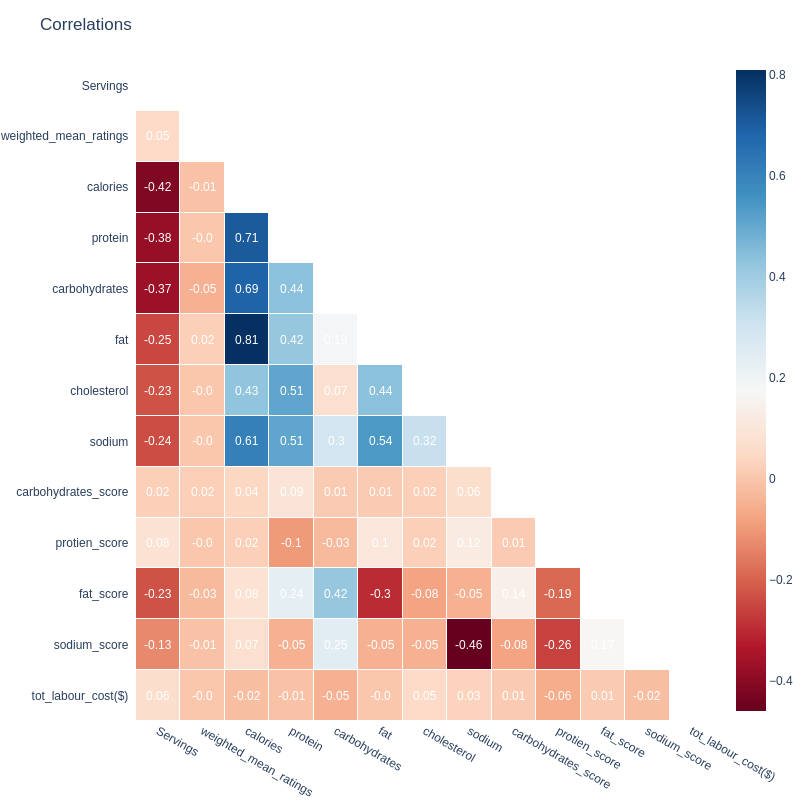

In [46]:
corr_heat = plotly_corr_heatmap(final_df)
# Uncomment corr_heat.show() below for interactive image 
#corr_heat.show()
Image(pio.to_image(corr_heat, format='png'))


We may have noticed the above correlation results from the sweetviz results the other day. 
- To summarize, weighted mean ratings do not seem to be well correlated with any of the features. 
- fat scores  are positively correlated with per serving carbohydrates. This is not expected (by a non-food expert), and need further investigations. As expected fat scores are negatively correlated with per serving fat since high fat recipes are nomaly labeled as bad.
- Protein scores are positively correlated with per serving sodium and fat, however the r values are small. This is also not expected (by a non-food expert). Other unexpected ( again by a non-food expert) results are high sodium recipes tend to be associated more with high calorie, protein and fat, and cholesterol recipes and vice versa.
- tot labour cost ( strictly speaking time it takes until a recipe is on the dining table) is only weakly correlated with the number of servings. I would have guessed high correlation. 
- The above  correlations are generally not very helpful to decide on what to do next. There must be something else to tell us the relative importance of each feature for a label, which we may have to change from weighted mean ratings to something else! But first lets give it few more chances. It is very weakly correlated with the number of servings.

Lets dig into the features a bit... <br>
For example, it looks like the fat data is best described by a beta function:   $\mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt$, where x and y are complex number inputs  such that thier real parts are positive.


In [47]:
final_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
0,30,29.666667,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,8.333333
1,24,0.533333,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,11.000000
3,16,4.000000,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,10.000000
4,28,35.000000,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,5.833333
5,8,5.800000,456.0,11.2,15.3,40.4,42.7,414.0,low,low,1.0,low,1.0,high,0.0,good,2.0,good,10.000000


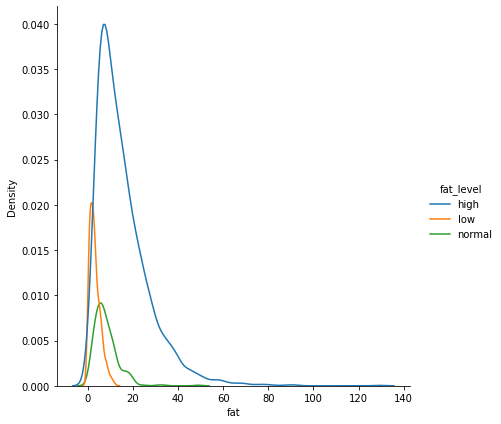

In [62]:
sns.displot(data = final_df, x='fat', kind='kde', height=6,aspect=1, hue='fat_level')
plt.show()

- From above figure we can see that the majority of the recipes have high fat levels.  

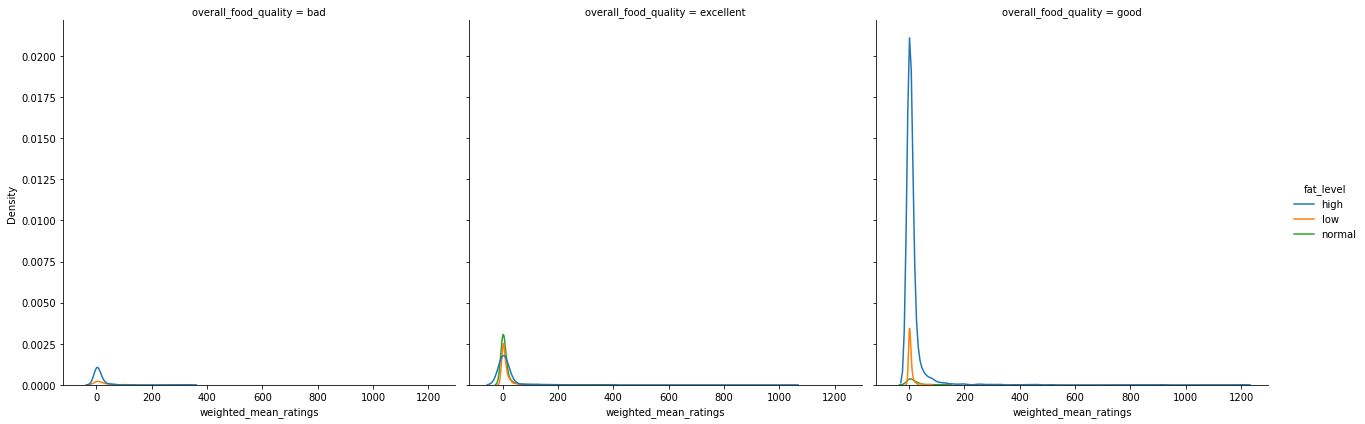

In [60]:
sns.displot(data = final_df, x='weighted_mean_ratings', kind='kde', height=6,aspect=1, col='overall_food_quality',hue='fat_level')
plt.show()

- From above figure we can see that the majority of the recipes we have fall under the good food category. Within that category the high fat level recipes are the most frequent. Virtually there are no recipes with normal fat level and bad overall food quality.  

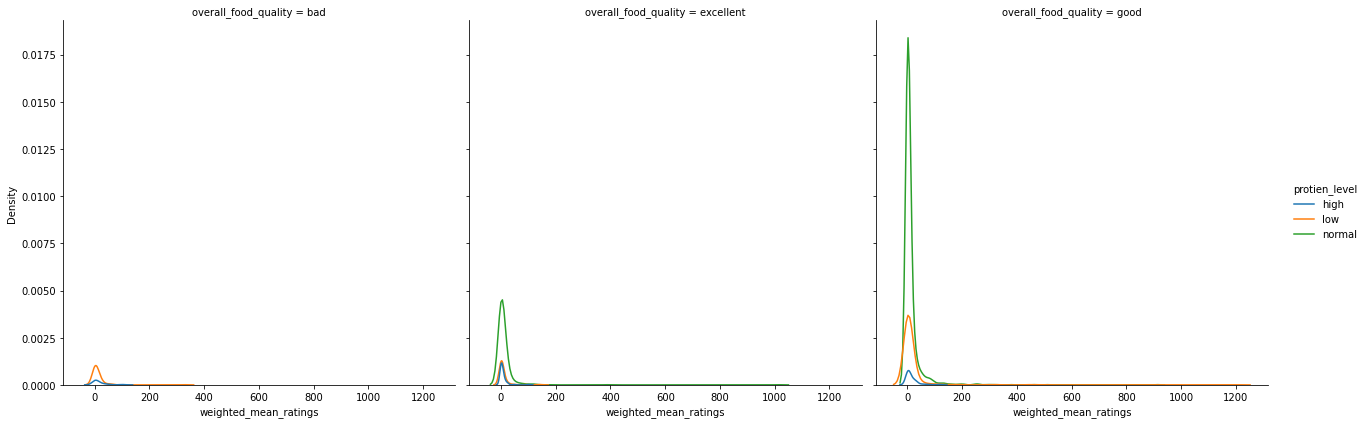

In [58]:
sns.displot(data = final_df, x='weighted_mean_ratings', kind='kde', height=6,aspect=1, col='overall_food_quality',hue='protien_level')
plt.show()

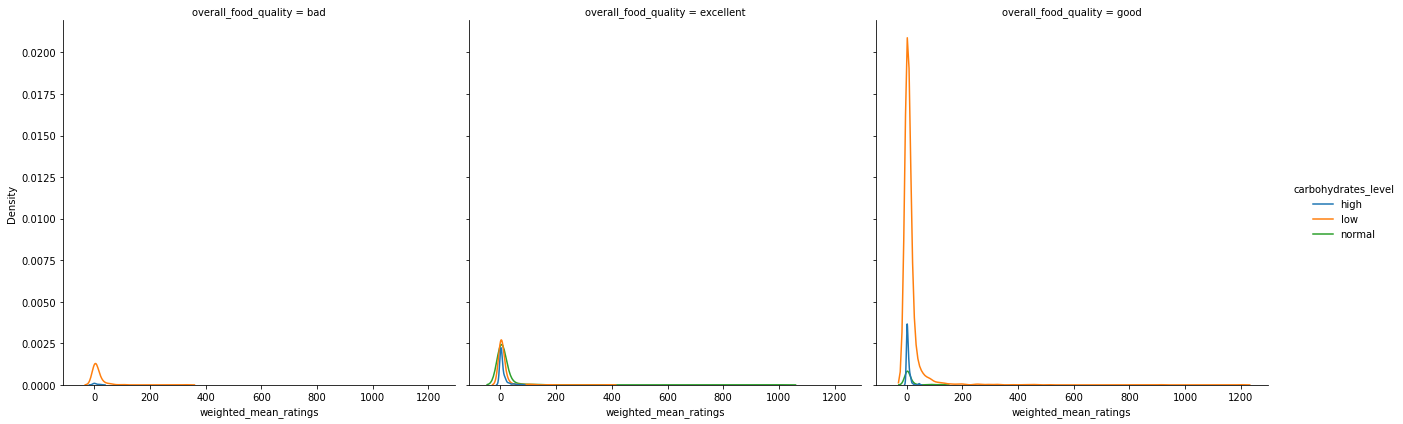

In [59]:
sns.displot(data = final_df, x='weighted_mean_ratings', kind='kde', height=6,aspect=1, col='overall_food_quality',hue='carbohydrates_level')
plt.show()

From the above three plots we can say that:-
-  good quality recipe will have low carbs, normal protein and high fat levels. 
- An excellent recipe will likely have more or less the same weighted mean ratings regardless of the carbohydrate levels ( third plot, middle). 

### Model Selection and Training
Let's jump into some regression calculations to predict the weighted mean ratings.

In [63]:
from sklearn.model_selection import train_test_split
X = final_encoded_df.drop(columns='weighted_mean_ratings')
y = final_encoded_df['weighted_mean_ratings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [65]:
lm = LinearRegression() 
lm.fit(X_train,y_train) 
model_evaluate_df=pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
# model_evaluate_df.sort_values(by='Coefficients', ascending=False).style.background_gradient(cmap='Blues')

- The linear regression coefficients repeat a similar result to what we have seen before, but what about the standard errors and statistical significances?

In [66]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=np.zeros(X.shape[1])
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
model_evaluate_df['Standard Error']=se
model_evaluate_df['t-statistic']=model_evaluate_df['Coefficients']/model_evaluate_df['Standard Error']
model_evaluate_df.sort_values(by='t-statistic', ascending=False).style.background_gradient(cmap='Blues')

,Coefficients,Standard Error,t-statistic
calories,0.164937,0.020444,8.067581
Servings,1.647767,0.332765,4.951738
sodium_level,12.020457,3.471020,3.463091
protein,0.082038,0.034981,2.345213
sodium,0.007378,0.003586,2.057672
fat_level,5.072706,4.736477,1.070987
fat_score,5.072706,4.736477,1.070987
carbohydrates_level,1.672693,6.627243,0.252397
carbohydrates_score,1.672693,6.627243,0.252397
overall_food_quality,0.605987,5.366954,0.112911


In [67]:
print("R-squared value :",round(metrics.r2_score(y_train,train_pred),2))

R-squared value : 0.02


- The linear regression model to predict weighted_mean_ratings is not good. This is okay since we already know there are no features that can help predict the target (weighted_mean_ratings).
- Also, we have redundant features ( by construction) such as fat_score and fat_level. Remove redundant features that don't add extra information.

In [68]:
# predictions
predictions = lm.predict(X_test)

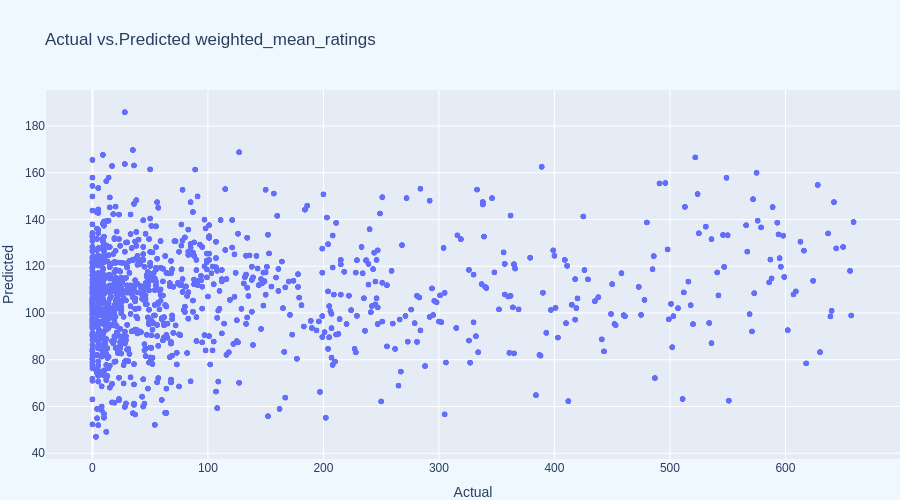

In [69]:
fig =  px.scatter(x=y_test, y=predictions)
fig.update_layout(width=900, height=500,
paper_bgcolor = 'aliceblue',
title =f'Actual vs.Predicted weighted_mean_ratings',
margin = dict(l=0,r=0,b=0,t=90 ),
coloraxis_colorbar_x=.85,
        )
fig.layout.xaxis.title = 'Actual '
fig.layout.yaxis.title = 'Predicted '

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

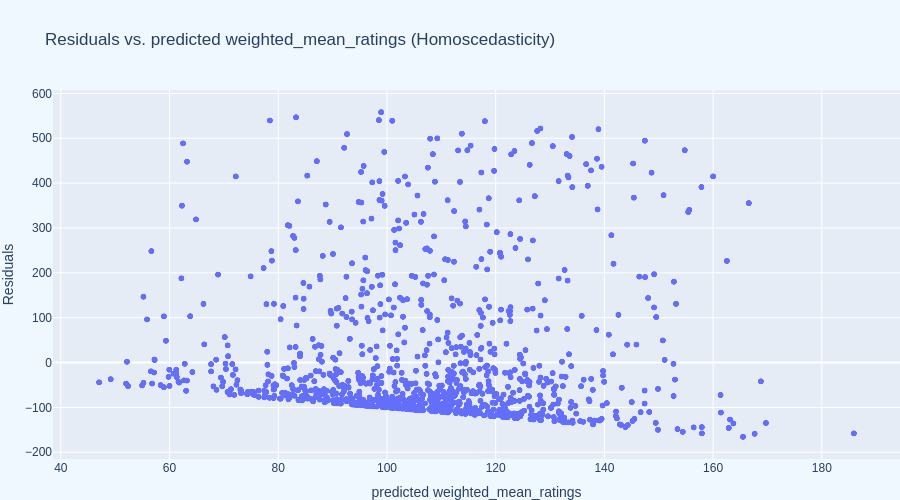

In [70]:
fig =  px.scatter(x=predictions,y=y_test-predictions)
fig.update_layout(width=900, height=500,
paper_bgcolor = 'aliceblue',
title =f'Residuals vs. predicted weighted_mean_ratings (Homoscedasticity)',
margin = dict(l=0,r=0,b=0,t=90 ),
coloraxis_colorbar_x=.85,
        )
fig.layout.xaxis.title = 'predicted weighted_mean_ratings'
fig.layout.yaxis.title = 'Residuals'

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))



- The model is over predicting weighted mean ratings. The predictions get worse as the ratings increase. Overall, this is a useless model for predicting weighted mean ratings.
- Next we try logistic and random forests regressions on some other labels like overall food quality. We found carb levels appear the best indicators of overall food quality of a recipe, followed by sodium and fat levels. However, the correlations are very small.


In [71]:
final_encoded_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
0,26,390,154,46,179,85,210,1564,0,1,1,2,2,0,0,0,0,2,48
1,21,8,53,25,109,14,115,1168,0,2,2,2,2,1,1,0,0,1,62
3,15,60,261,78,329,123,89,2375,0,2,2,2,2,0,0,0,0,2,58
4,25,422,107,41,173,41,366,1004,0,2,2,2,2,2,2,2,1,1,34
5,7,87,440,111,152,390,421,1780,0,1,1,1,1,0,0,1,2,2,58


In [72]:
# Logestic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = final_encoded_df.drop(columns='overall_food_quality')
y = final_encoded_df['overall_food_quality']
# We have to scale our data to get better results. Let's try the basic normalization scaling (ie., subtract the mean and divide by standard deviations). 
#This is not suitable to our data here since there are many outliers. We might need something like scaling with outliers.
from sklearn.pipeline import make_pipeline, Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.9642529789184234

- the above model has an accuracy of 96.5%, and that is pretty high. 

In [73]:
from  collections  import Counter as COUNT

print('in predictions:',COUNT(pipe.predict(X_test)))
print('in actual data:',COUNT(y_test))


in predictions: Counter({2: 794, 1: 245, 0: 52})
in actual data: Counter({2: 779, 1: 262, 0: 50})


- indivdually looking, the model is good at predicting the bad over all food quality ( over estimation only by 2). 17 less excellent overall food qulities than actual. 15 more good  overall food qulities than actual. These results  must be reflections of the training dataset.

In [74]:
# print('in predictions:',COUNT(pipe.predict(X_train)))
print('in training data:',COUNT(y_train))

in training data: Counter({2: 1858, 1: 565, 0: 122})


- Let's use outlier scaling of the features

In [75]:
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

pipe = make_pipeline(RobustScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression())])
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9578368469294225

- Looks like it got worse

In [76]:
print('in predictions:',COUNT(pipe.predict(X_test)))
print('in actual data:',COUNT(y_test))

in predictions: Counter({2: 796, 1: 247, 0: 48})
in actual data: Counter({2: 779, 1: 262, 0: 50})


- Let's experiment with all available scaling methods from the [scikit-learn.org website](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py). Note that I modified their script so it takes in few arguments as input

In [77]:
from plot_all_scaling import zscale

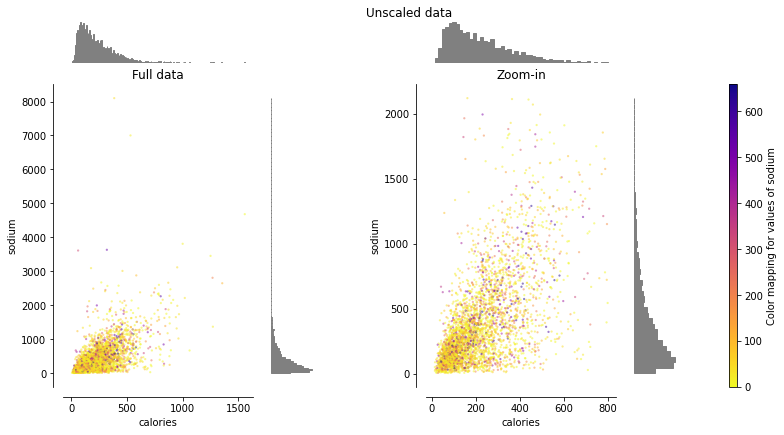

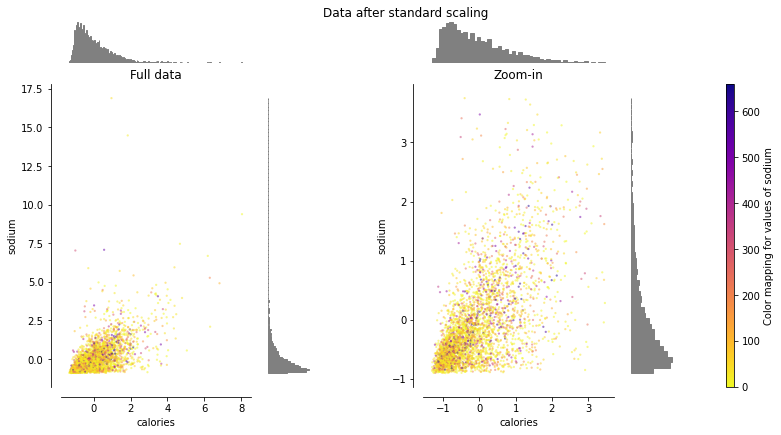

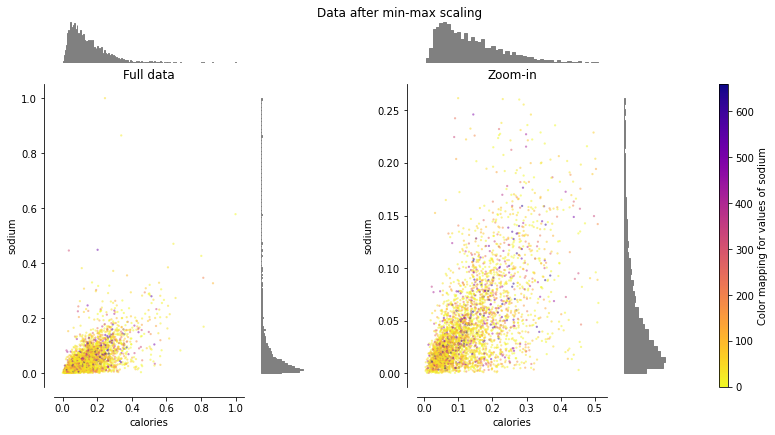

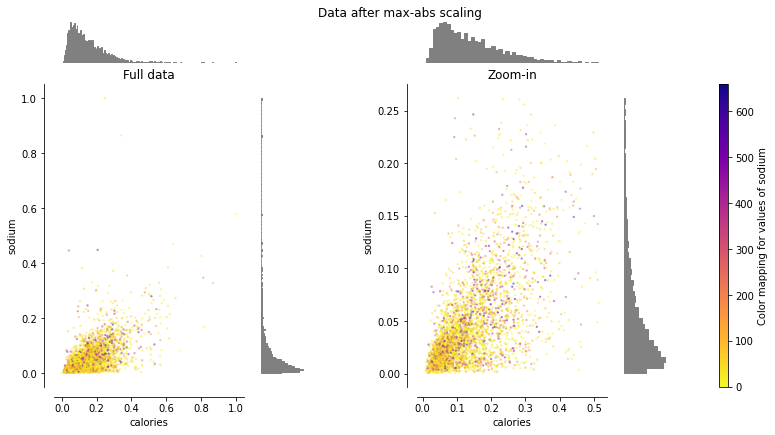

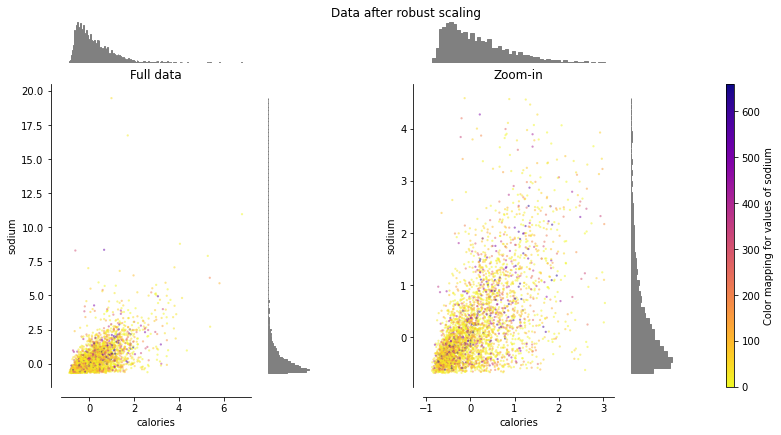

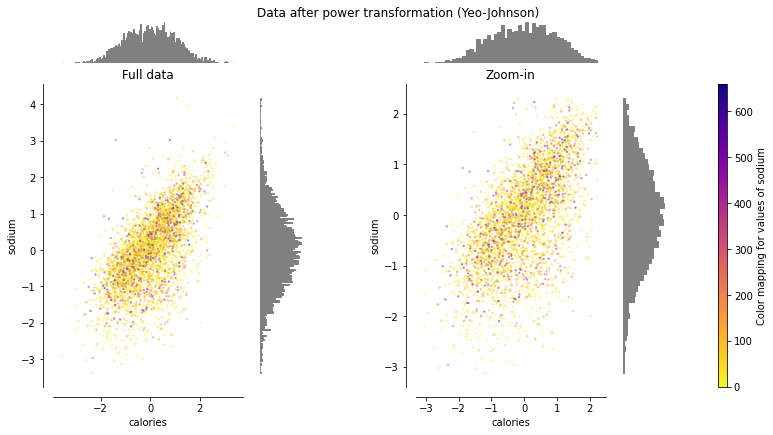

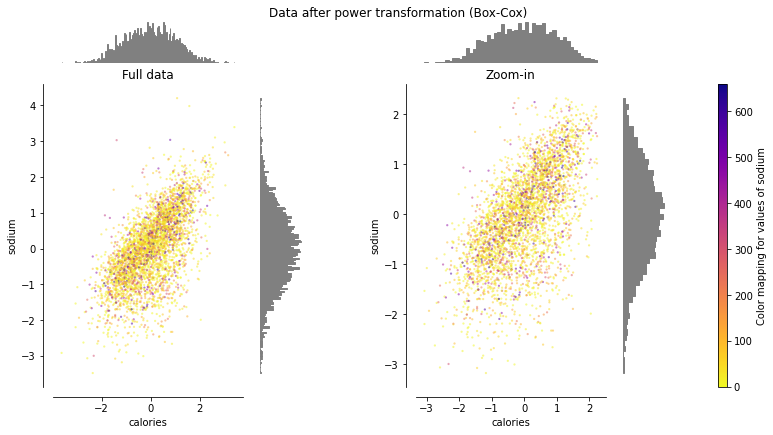

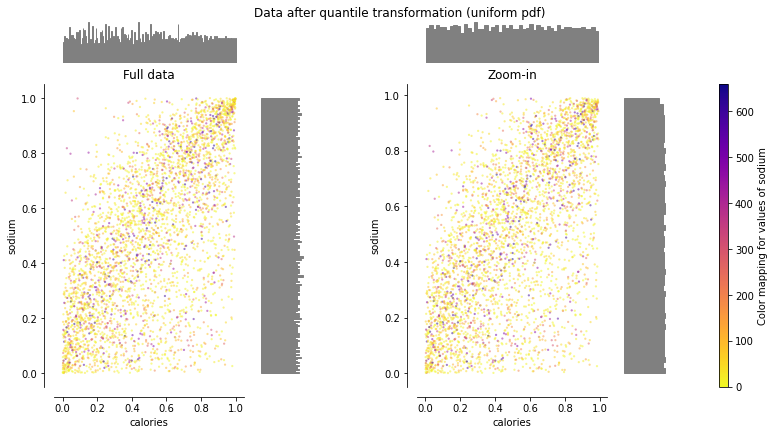

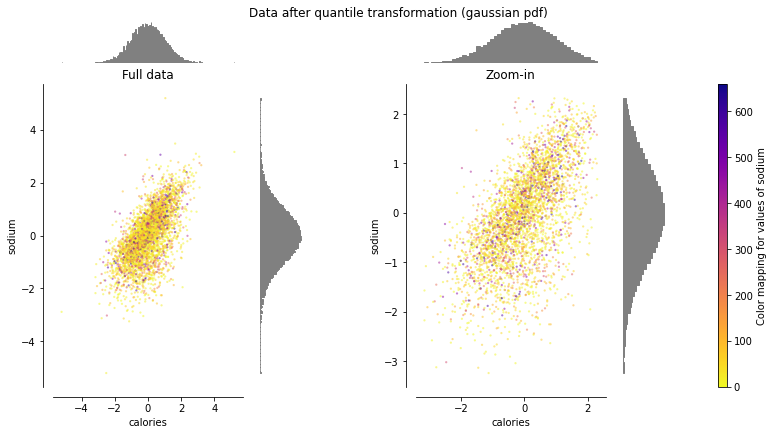

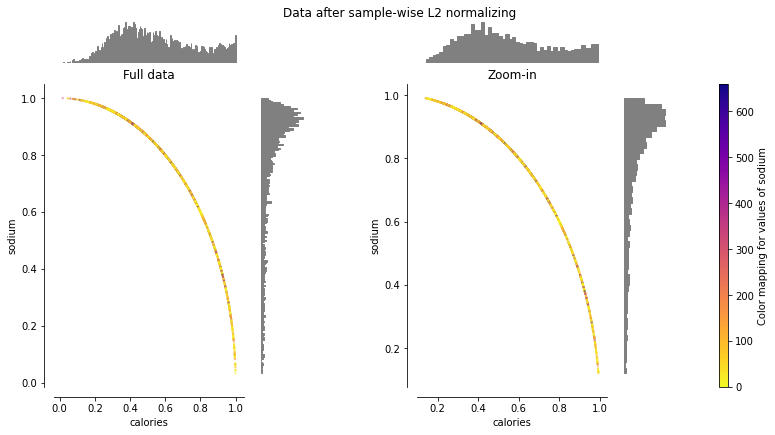

In [78]:
zscale(np.array(final_df[['calories','sodium']]),np.array(final_encoded_df['weighted_mean_ratings']),'calories','sodium')

- from above results, the quantile transform looks to work best for at least some of our data. The Box-Cox transformation does a good job as well, but it can only be applied to strictly positive data


In [79]:
from sklearn.preprocessing import QuantileTransformer
X = final_encoded_df.drop(columns='overall_food_quality')
y = final_encoded_df['overall_food_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

pipe = make_pipeline(QuantileTransformer(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('logisticregression', LogisticRegression())])
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9651695692025665

- that is the best score so far. Lets see how the model performs...

In [80]:
print('in predictions:',COUNT(pipe.predict(X_test)))
print('in actual data:',COUNT(y_test))

in predictions: Counter({2: 802, 1: 232, 0: 57})
in actual data: Counter({2: 790, 1: 250, 0: 51})


- the model is good at predicting the bad over all food quality ( over estimation only by 6). 
- 18 less excellent overall food qualities than actual. 
- 12 more good  overall food qualities than actual. These results  must be reflections of the training dataset.

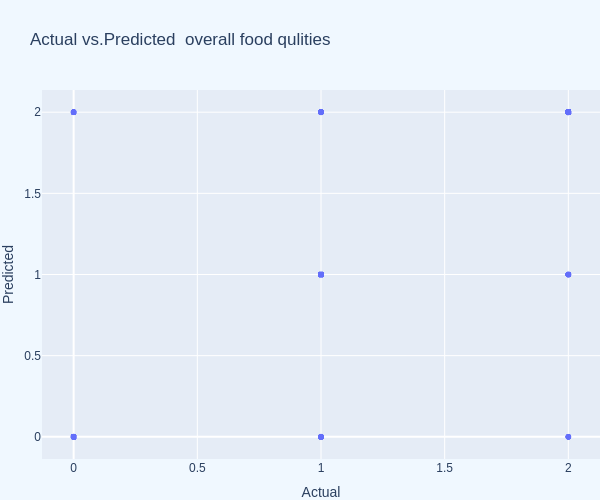

In [81]:
fig =  px.scatter(x=y_test, y=pipe.predict(X_test))
fig.update_layout(width=600, height=500,
paper_bgcolor = 'aliceblue',
title =f'Actual vs.Predicted  overall food qulities',
margin = dict(l=0,r=0,b=0,t=90 ),
coloraxis_colorbar_x=.85,
        )
fig.layout.xaxis.title = 'Actual '
fig.layout.yaxis.title = 'Predicted '

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

- Above figure shows the Logistic Regression is not very good despite the high score. 

# Random Forest Classification ( we'll use the regression later)

In [82]:
#We will use the QuantileTransformer again for scaling the data before using RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier

X = final_encoded_df.drop(columns='overall_food_quality')
y = final_encoded_df['overall_food_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

pipe = make_pipeline(QuantileTransformer(), RandomForestClassifier(n_estimators=100))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('logisticregression', RandomForestClassifier(n_estimators=100))])
predicted = pipe.predict(X_test)
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.999083409715857

In [83]:
# single prediction example with a compliment, if user picks good food

def compliment(x):
    if x==0: # bad
        return 'Not a good choice. You picked bad food.'
    elif x==1:  # excellent
         return 'Great choice. You picked excellent food.'
    elif x==2: # good
        return 'Good choice. You picked good food.'
    
# inverse_final_encoded_df.sort_values(by='Servings').head(1)
single_test_data = final_encoded_df.drop(columns='overall_food_quality').sort_values(by='Servings').head(1)
print('Test Data:\n')
display(single_test_data)
print('Encoded data including overall_food_quality\n')
display(final_encoded_df.sort_values(by='Servings').head(1))
print('Predicted overall food quality:\t {}. {}'.format(pipe.predict(single_test_data)[0],compliment(pipe.predict(single_test_data)[0])))
print('Verify label prediction:\t', inverse_final_encoded_df.sort_values(by='Servings')['overall_food_quality'].head(1).values[0])

Test Data:



,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,tot_labour_cost($)
5084,0,77,428,356,355,150,557,2843,0,1,1,0,0,2,2,0,0,29


Encoded data including overall_food_quality



,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
5084,0,77,428,356,355,150,557,2843,0,1,1,0,0,2,2,0,0,2,29


Predicted overall food quality:	 2. Good choice. You picked good food.
Verify label prediction:	 good


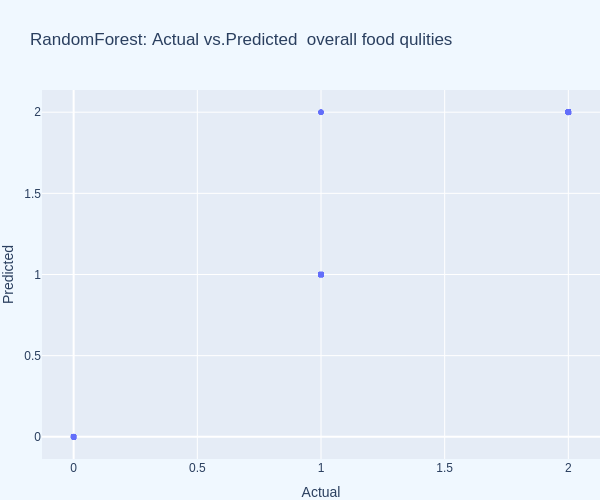

In [84]:
fig =  px.scatter(x=y_test, y=predicted)
fig.update_layout(width=600, height=500,
paper_bgcolor = 'aliceblue',
title =f'RandomForest: Actual vs.Predicted  overall food qulities',
margin = dict(l=0,r=0,b=0,t=90 ),
coloraxis_colorbar_x=.85,
        )
fig.layout.xaxis.title = 'Actual '
fig.layout.yaxis.title = 'Predicted '

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

In [85]:
print('in predictions:',COUNT(pipe.predict(X_test)))
print('in actual data:',COUNT(y_test))

in predictions: Counter({2: 791, 1: 254, 0: 46})
in actual data: Counter({2: 790, 1: 255, 0: 46})


- Above results using RandomForest classification shows how a superior classification the algorithm is over other classification algorithms. Part of it is because there are no biases due to averaging over multiple trees. There are also no overfitting problems with this algorithm, for the same reason of averaging. 
- Beyond its powerful classification benefits, Random Forests also makes a good feature selection method. We will utilize it below to identify which feature best contributes to the overall food quality

In [86]:
feature_imp = pd.DataFrame({'Feature':pipe.steps[1][1].feature_importances_},index=X.columns) #.sort_values(by='Feature',ascending=False) #.sort_values(ascending=True)
feature_imp.sort_values(by='Feature',ascending=True, inplace=True)

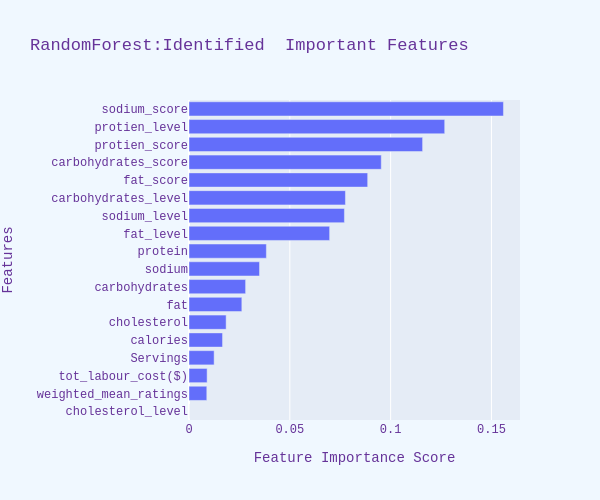

In [87]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=feature_imp.Feature,
            y=list(feature_imp.index),
            orientation='h'

           )
               )


fig.update_layout(
    title="RandomForest:Identified  Important Features",
    xaxis_title="Feature Importance Score",
    yaxis_title="Features",
    legend_title="Legend Title",
    width=600, height=500,
    paper_bgcolor = 'aliceblue',
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

- The above feature importance results are very interesting. Generally the categorical features are more important for predicting the label/target, which is  overall food quality. This is not surprising given how we engineered the label itself out of these features. 

- Once again, it is interesting total cost does not help predict overall food quality. 

- What is also interesting is that the the weighted mean ratings are the second least important feature for predicting the overall food quality. In other words, highly rated recipe does not necessarily mean it provides high food quality. Amount of servings, as expected, does not have any importance to food quality.
- The idea of feature ranking and selection is for reducing  dimensions and perhaps improve predictions. In our case the RandomForest algorithm is already almost perfect (a bit nervous to say the word but the ensemble averaging is here is encouraging), and not too slow, we are working with a relatively small dataset. Hence, we end the RandomForest Classification exercise here. Instead we go back to the regression analyses using the most important features. First we'll do RandomForest Regression to predict food quality, using the top few features. By construction, level and score features are similar, as is also evident in the feature importance figure above. We will drop all the *_score features. That will leave us with five top features, including the tot labour cost, that we can use. 
- It should be noted that the importance score add up to 1. So, small values does simply mean there are many important features. We know some of them carry redundant information. 

# Random Forest Regression 

- First select the better features only

In [88]:
best_features = [i for i in  feature_imp.index if '_level' in i and 'cholesterol' not in i]
best_features

['fat_level', 'sodium_level', 'carbohydrates_level', 'protien_level']

In [89]:
#We will use the QuantileTransformer again for scaling the data before using RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestRegressor

X = final_encoded_df[best_features]
y = final_encoded_df['overall_food_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
pipe = make_pipeline(QuantileTransformer(), RandomForestRegressor(n_estimators=100))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('logisticregression', RandomForestRegressor(n_estimators=100))])
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
 

0.9999558041921522

- Again the best regression score so far

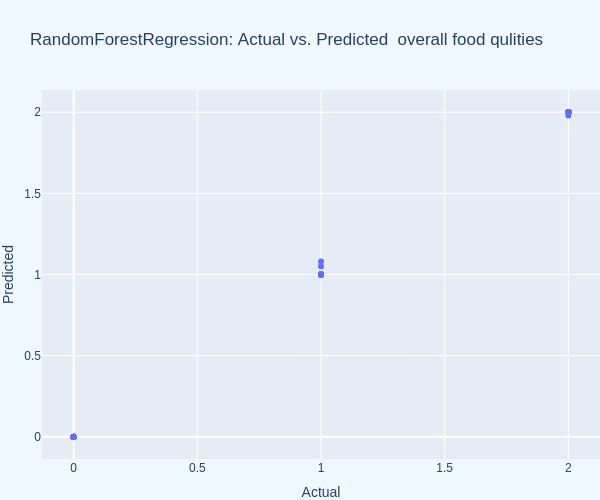

In [90]:
predictions = pipe.predict(X_test)

fig =  px.scatter(x=y_test, y=predictions)
fig.update_layout(width=600, height=500,
paper_bgcolor = 'aliceblue',
title =f'RandomForestRegression: Actual vs. Predicted  overall food qulities',
margin = dict(l=0,r=0,b=0,t=90 ),
coloraxis_colorbar_x=.85)
fig.layout.xaxis.title = 'Actual '
fig.layout.yaxis.title = 'Predicted '

# Uncomment fig.show() below for interactive image 
#fig.show()
Image(pio.to_image(fig, format='png'))

In [91]:
print('label 0, 1 and 2 and their counts')
print('in predictions:',COUNT(predictions))
print('in actual data:',COUNT(y_test))

label 0, 1 and 2 and their counts
in predictions: Counter({2.0: 520, 1.0: 179, 0.0: 26, 1.98: 1, 1.05: 1, 1.08: 1})
in actual data: Counter({2: 521, 1: 181, 0: 26})


There is some interesting thing happening above. The  model predicts floats, not int. If we round off the results, we get what we want, ie., predicted label 0.02 becomes 0 etc. This reminds me to declare the label as a int.

In [92]:
print('label 0, 1 and 2 and their counts')
print('in predictions:',COUNT(predictions.round(0)))
print('in actual data:',COUNT(y_test))

label 0, 1 and 2 and their counts
in predictions: Counter({2.0: 521, 1.0: 181, 0.0: 26})
in actual data: Counter({2: 521, 1: 181, 0: 26})


### Revisiting some of the questions we paused earlier..


- On average, do people love good/healthy food? <span style="color:blue"> The correct answer should be: We can't really tell from our little experiment here. What we can tell is from the data we have, there is  no evidence of causal relationship between quality of recipe/food and average ratings.</span>

- Is there a statistically significant relationship between star ratings and say labour cost/time of making the recipe? <span style="color:blue">No.</span>

- Can we build a nice, unsupervised classification of recipes using ML algorithms? <span style="color:blue">Probably yes. However, it was the supervised ML, specifically RandomForest classification and regression that did the best job with our data. Just for the sake of making progress, I will build a nice streamlit app and deploy the model. </span>

- What other questions can we ask on results of unsupervised ML experiments? <span style="color:blue">coming soon...</span>

- and a lot more questions.

## Planning the RandomForest Classification Model app

- Backend
 - database management (allow users select recipes from our database). I could let users bring their own recipes and get the ratings, but running out of time for this project. Going to make it easy...
 - model   
    - The only features we will train the model on are 'fat_level', 'sodium_level', 'carbohydrates_level', and 'protien_level'.
    - The model input will be such that a user selects a recipe, and based on the recipe's id in the database we access the per serving 'fat ', 'sodium', 'carbohydratesl', and 'protien' values (if all avaialble). Then create the *_level features, and feed them to the model.

- Frontend
  - Interface for adding nutrient amounts or edit those obtained from the database. The latter the easiest for me since my vacation time is almost up, and won't have enough time to work on this project anymore!
  - Display rate of selected recipe as excellent, good, or bad. Not a medical advice.
- Deployment platform 
  - Heroku
  - AWS
  - Google Cloud
  - Azure
  - etc. 

- Maintenance and persistence
 - We will save both the model and metadata (including scripts used to preprocess training data, sikit-learn version etc)
    - We will save the model in a pickle file.
    - We will save the metadata in a json file.
 


In [93]:
%reset

Nothing done.
